# Convolutional Neural Nets

This type of neural nets are predominantly (and heavily) used in image processing.

## Useful terms:

1. Convolution
2. Max pooling
2. Softmax
3. Cross Entropy

## Further Readings:
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

mnist = input_data.read_data_sets('./')

Using Theano backend.


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [2]:
x, y = mnist.train.next_batch(20)
num_pixels = x.shape[1]
width = 28
height = 28

In [3]:
x.shape

(20, 784)

In [4]:
y.shape

(20,)

In [5]:
y

array([7, 3, 4, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 2, 7, 0, 2, 9, 6, 0], dtype=uint8)

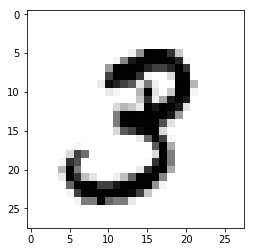

In [7]:
plt.imshow(x[1].reshape((28,28)),cmap='Greys')
plt.show()

## Basic logistic multiclass classification:

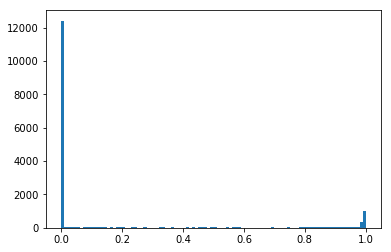

In [9]:
plt.hist(x.ravel(),100)
plt.show()

In [10]:
x_train, y_train = mnist.train.next_batch(1000)
x_test, y_test = mnist.test.next_batch(1000)

In [11]:
logistic = LogisticRegression()
#TODO: train(fit) the logistic model
logistic.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
y_pred = # TODO: predict with the logistic model
y_pred[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

Predicting the probabilities for the first 3 images:

In [133]:
logistic.predict_proba(x_test[:3])

array([[  5.43206045e-03,   6.41600150e-05,   4.81991694e-03,
          1.33296617e-01,   1.20962188e-04,   3.84210471e-04,
          2.80679706e-05,   8.48845217e-01,   5.25197830e-04,
          6.48359023e-03],
       [  2.84037617e-02,   5.71285866e-06,   6.31202299e-01,
          4.44730429e-02,   1.07654460e-08,   2.58102091e-01,
          3.60641965e-02,   6.78232280e-10,   1.74882649e-03,
          5.76337007e-08],
       [  1.71209857e-04,   9.28549699e-01,   1.68454544e-02,
          1.30787773e-02,   2.82055846e-03,   4.53937143e-03,
          9.59213815e-03,   7.95202975e-03,   1.10977136e-02,
          5.35304822e-03]])

Accuracy of the predictions:

In [134]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.845

## Keras Multilayered Perceptron (Neural Net)

In [111]:
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x, y

### Zero hidden layers

It is important to note that when we do classification problems we use the **Categorical Crossentropy Loss**. When its only two classes we can use Logistic Loss (Binary Crossentropy Loss). Finally for regression problems we use **Mean Squared Error**.

The Cross Entropy loss is defined as:
$$\mathcal{L} = -\frac{1}{N}\sum_i \mathcal{I}(y_i=1)\log(p_{i1})+\mathcal{I}(y_i=2)\log(1-p_{i2})+\cdots++\mathcal{I}(y_i=K)\log(1-p_{iK})$$
where $N$ is the number of training instances, $K$ is the number of classes and $p_{ik}$ is the probability that instance $i$ belongs to $k$.

Softmax takes a $D$ dimensional vector and squeezes them through a function such that we have $D$ outputs whos values are positive and sums to one.
$$
\text{softmax}(\mathbf{y})_d = \frac{\exp(-y_d)}{\exp(-y_1)+...+\exp(-y_D)}
$$

In [126]:
model = Sequential()
model.add(Dense(units=10, input_dim=num_pixels, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [127]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s - loss: 1.3211     

In [135]:
y_pred = model.predict_classes(x_test)
y_pred[:10]

  32/1000 [..............................] - ETA: 0s

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 7])

In [136]:
np.count_nonzero(y_pred == y_test)/len(y_test)

0.804

### 1 Hidden Layer

In [137]:
model = Sequential()
# TODO: Do the same as above but have 1 hidden Layer

In [138]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=1)

Epoch 1/1
214/214 [==============================] - 1s - loss: 0.8048     

In [139]:
y_pred = model.predict_classes(x_test)
np.count_nonzero(y_pred == y_test)/len(y_test)

  32/1000 [..............................] - ETA: 0s

0.893

In [140]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
Total params: 39,760.0
Trainable params: 39,760
Non-trainable params: 0.0
_________________________________________________________________


## Convolution Neural Networks (CNN)

** Points to note **
1. One CNN, connected to **one** node above is simply a Dense layer with most weights set to zero.
2. The same CNN, connected to multiple nodes is weight tying/ sharing.

Consider the following convolution mask:
<img src='https://ujwlkarn.files.wordpress.com/2016/07/screen-shot-2016-07-24-at-11-25-24-pm.png?w=74&h=64'>
<img src='https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=536&h=392'>

![](cnn.png)

In [154]:
# Need to reshape the x values to a 28x28 image
def train_data_generator(batch_size):
    while(1):
        x, y = mnist.train.next_batch(batch_size)
        yield x.reshape((-1,28,28,1)), y

In [188]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(Flatten())
# TODO: Add the final layer and compile the model (same as previous models last layer)

In [189]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=5)

Epoch 1/5
214/214 [==============================] - 17s - loss: 0.4825     

In [190]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

 608/1000 [=================>............] - ETA: 0s

0.969

In [191]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_6 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                250890    
Total params: 251,210.0
Trainable params: 251,210.0
Non-trainable params: 0.0
_________________________________________________________________


### Using the max pooling layer:

In [192]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape = (width,height,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adadelta', loss='sparse_categorical_crossentropy')

In [193]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                62730     
Total params: 63,050.0
Trainable params: 63,050.0
Non-trainable params: 0.0
_________________________________________________________________


In [194]:
batch_size = 256
model.fit_generator(train_data_generator(batch_size=batch_size), mnist.train.num_examples//batch_size, epochs=5)

Epoch 1/5
214/214 [==============================] - 20s - loss: 0.6041     

In [195]:
y_pred = model.predict_classes(x_test.reshape((-1,28,28,1)))
np.count_nonzero(y_pred == y_test)/len(y_test)

 736/1000 [=====================>........] - ETA: 0s

0.964